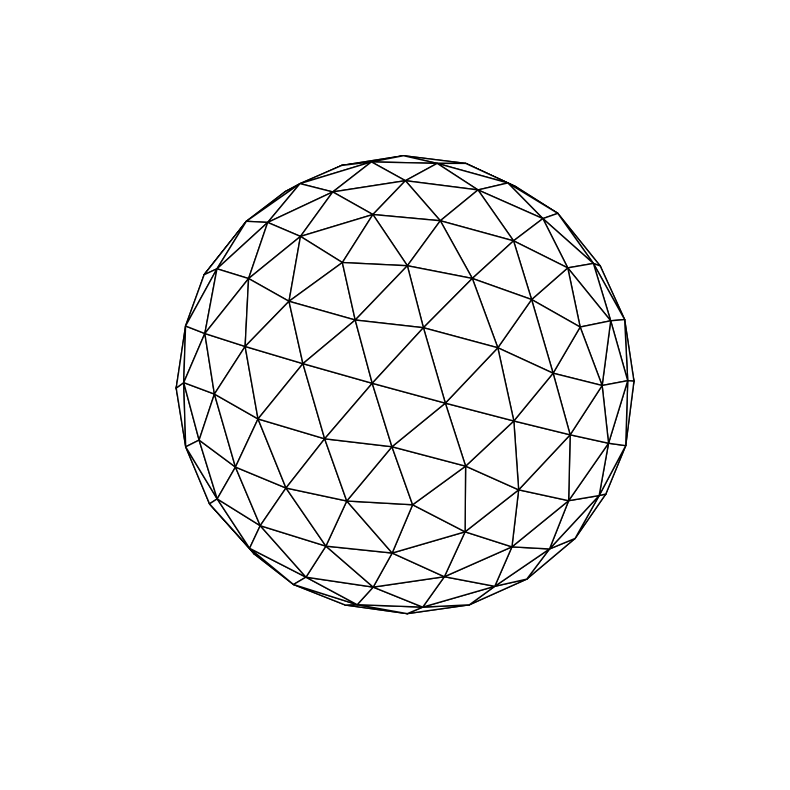

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import jax.numpy as jnp

def create_icosphere(subdivision_level=1):
    # Start with an icosahedron
    t = (1.0 + np.sqrt(5.0)) / 2.0
    
    # Define the vertices
    vertices = np.array([
        [-1, t, 0], [1, t, 0], [-1, -t, 0], [1, -t, 0],
        [0, -1, t], [0, 1, t], [0, -1, -t], [0, 1, -t],
        [t, 0, -1], [t, 0, 1], [-t, 0, -1], [-t, 0, 1]
    ])
    
    # Normalize vertices to lie on unit sphere
    vertices = vertices / np.sqrt(np.sum(vertices**2, axis=1, keepdims=True))
    
    # Define the faces
    faces = [
        [0, 11, 5], [0, 5, 1], [0, 1, 7], [0, 7, 10], [0, 10, 11],
        [1, 5, 9], [5, 11, 4], [11, 10, 2], [10, 7, 6], [7, 1, 8],
        [3, 9, 4], [3, 4, 2], [3, 2, 6], [3, 6, 8], [3, 8, 9],
        [4, 9, 5], [2, 4, 11], [6, 2, 10], [8, 6, 7], [9, 8, 1]
    ]
    
    # Subdivide the mesh if requested
    for _ in range(subdivision_level):
        new_faces = []
        for face in faces:
            v0, v1, v2 = vertices[face]
            
            # Create new vertices at the midpoints
            v01 = (v0 + v1) / 2
            v12 = (v1 + v2) / 2
            v20 = (v2 + v0) / 2
            
            # Normalize to push to sphere
            v01 = v01 / np.linalg.norm(v01)
            v12 = v12 / np.linalg.norm(v12)
            v20 = v20 / np.linalg.norm(v20)
            
            # Add new vertices
            idx_v01 = len(vertices)
            idx_v12 = len(vertices) + 1
            idx_v20 = len(vertices) + 2
            vertices = np.vstack([vertices, v01, v12, v20])
            
            # Create new faces
            idx_v0 = face[0]
            idx_v1 = face[1]
            idx_v2 = face[2]
            new_faces.append([idx_v0, idx_v01, idx_v20])
            new_faces.append([idx_v01, idx_v1, idx_v12])
            new_faces.append([idx_v20, idx_v12, idx_v2])
            new_faces.append([idx_v01, idx_v12, idx_v20])
        
        faces = new_faces
    
    return vertices, faces

# Create the icosphere
vertices, faces = create_icosphere(subdivision_level=2)

# Create a figure with a 3D axis - make it square
fig = plt.figure(figsize=(8, 8))  # Changed to 8x8 to make it square
ax = fig.add_subplot(111, projection='3d')

# Create a collection of polygons
poly3d = [[vertices[face_idx] for face_idx in face] for face in faces]
# Make the icosphere white
collection = Poly3DCollection(poly3d, alpha=1.0, linewidths=1, edgecolor='k', facecolor='white')

# Add the collection to the axis
ax.add_collection3d(collection)

# Set axis limits
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# Remove grid, background, and axis
ax.grid(False)
ax.set_axis_off()
ax.set_facecolor('none')
fig.patch.set_facecolor('none')

# Set equal aspect ratio to ensure the sphere isn't stretched
ax.set_box_aspect([1, 1, 1])  # Added to ensure equal scaling on all axes

plt.tight_layout()
#plt.show()


In [10]:
# Save the figure as SVG
fig.savefig('icosphere.svg', format='svg', transparent=True, bbox_inches='tight', pad_inches=0)